## FASE 1 EXPLORACION Y LIMPIEZA

# 1_Importamos las librerías.

In [327]:
#1_Librerías
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
    # Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
    # Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import kruskal
from scipy.stats import levene
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
    # Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
    # Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# 2_ Lectura de ficheros.

In [106]:
#2_Lectura de ficheros
# _Cargamos nuestro fichero csv "Customer_Flight_Activity" con la actividad vuelos y sacamos los 5 primeros resultados.
df_activity = pd.read_csv("Customer_Flight_Activity.csv")
df_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [107]:
# Cargamos nuestros ficheros csv "Customer_Loyalty_History"con el perfil del cliente y sacamos los 5 primeros resultados.
df_customer = pd.read_csv("Customer_Loyalty_History.csv")
df_customer.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


# 3_Exploración inicial del dataset.

In [108]:
# Dataset Customer_Flight_Activity.csv
print(f"\nInformación del 1º dataset")
print("-----------------------------------")
print(df_activity.info())
print("-----------------------------------")
print(f"\nNombre de las columnas:")
print(df_activity.columns)
print("-----------------------------------")
print(f"\nEstructura datos:")
print(df_activity.shape)
print("------------------------------------")
print(f"\nParámetros estadísticos básicos:")
print(df_activity.describe().T)
print("-----------------------------------")
print(f"\nLos valores nulos son:")
print(df_activity.isnull().sum())
print("-----------------------------------")
print(f"\nEl tipo de datos:")
print(df_activity.dtypes)


Información del 1º dataset
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
None
-----------------------------------

Nombre de las columnas:


In [109]:
# Dataset Customer_Loyalty_History.
print(f"\nInformación del 2º dataset")
print("-----------------------------------")
print(df_customer.info())
print("-----------------------------------")
print(f"\nNombres de las columnas:")
print(df_customer.columns)
print("-----------------------------------")
print(f"\nEstructura datos:")
print(df_customer.shape)
print("-----------------------------------")
print(f"\nParámetros estadísticos básicos:")
print(df_customer.describe().T)
print("-----------------------------------")
print(f"\nLos valores nulos son:")
print(df_customer.isnull().sum())
print("-----------------------------------")
print(f"\nEl tipo de datos:")
print(df_customer.dtypes)


Información del 2º dataset
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   fl

Conclusión: Las funciones aplicadas anteriormente nos permiten obtener información sobre la estructura, datos, valores no nulos,parámetros estadísticos básicos de nuestros dataset. Asimismo, hemos identificado los valores nulos de nuestros archivos csv.
Podemos observar en el análisis realizado sobre la identificación de nulos que solo el Dataset Customer_Loyalty_History presenta valores nulos, en las columnas;  salary, cancellation year y cancellation month.

# 4_Manejo Valores Nulos

In [110]:
# Calculamos el % de nulos y ordenar el resultado.
null_customer=df_customer.isnull().sum()/df_customer.shape[0]*100
print(f"\nEl porcentaje de nulos ordenanados:")
print(null_customer.sort_values(ascending=False))
print("------------------------------------------")
# Seleccionamos solo las variables que tienen nulo.
null_customer = null_customer[null_customer > 0]
print(f"\nLas variables con nulos son:")
print(null_customer.sort_values(ascending=False))


El porcentaje de nulos ordenanados:
Cancellation Year     87.650117
Cancellation Month    87.650117
Salary                25.321145
Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
dtype: float64
------------------------------------------

Las variables con nulos son:
Cancellation Year     87.650117
Cancellation Month    87.650117
Salary                25.321145
dtype: float64


In [111]:
# Sacamos las variables con valores únicos de tipo categórico
for col in df_customer.select_dtypes(include='object'):
    print('-----------------------------')
    print("\nMis variables con valores unicos de tipo categórico son:")
    print(f"{col}")
    print(f"\n{df_customer[col].unique()}")

-----------------------------

Mis variables con valores unicos de tipo categórico son:
Country

['Canada']
-----------------------------

Mis variables con valores unicos de tipo categórico son:
Province

['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
-----------------------------

Mis variables con valores unicos de tipo categórico son:
City

['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
-----------------------------

Mis variables con valores unicos de tipo categórico son:
Postal Code

['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 

In [112]:
df_activity

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [113]:
df_customer

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


# 4_ Unimos los dataset y comprobamos que el resultado coincide con los análisis efectuados para cada uno de los datasetpor separados.
Usamos la función merge para unir por la columna de "Loyalty Number" que es la columna común entre ambos dataset.

In [114]:
# MERGE INNER por "Loyalty_Number".
merge_inner = df_customer.merge(df_activity, how='inner', on ='Loyalty Number',)
print(f"\nDataset unidos:")
merge_inner


Dataset unidos:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0


In [115]:
# Comprobamos que la exploración del dataset creado mediante la unión es igual que el sacado para cada uno indicidualmente.
print(f"\nInformación del dataset unido")
print("-----------------------------------")
print(merge_inner.info())
print("-----------------------------------")
print(f"\nNombres de las columnas del nuevo dataset:")
print(merge_inner.columns)
print("-----------------------------------")
print(f"\nEstructura del nuevo dataset:")
print(merge_inner.shape)
print("-------------------------------")
print(f"\nParámetros estadísticos básicos:")
print(merge_inner.describe().T)
print("-------------------------------")


Información del dataset unido
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  obje

# 5_ Limpieza de datos merge_inner: 
    - Identificados nulos 
    - Comprobar tipo dato columnas.
    - Separar variables categóricas y numéricas.
    - Estrategia según porcentaje nulos e importancia variable.
    - Duplicados ( eliminar duplicados)

In [116]:
# Contabilizamos el número de registros para poder aplicar estrategia.
print(f"\nNúmero de registros totales:")
merge_inner.shape[0]


Número de registros totales:


405624

In [117]:
# Comprobamos  el % de nulos y las variables con valores nulos mayores a 0.
porcentaje_nulos_merge =merge_inner.isnull().sum()/merge_inner.shape[0]*100
print(f"\nEl Porcentaje de Valores Nulos de mi dataset:")
print(porcentaje_nulos_merge.sort_values(ascending=False))
print("----------------------------------------")
porcentaje_nulos_merge = porcentaje_nulos_merge[porcentaje_nulos_merge >0]
print(f"\nLas variables con nulos son:")
porcentaje_nulos_merge.sort_values(ascending=False)


El Porcentaje de Valores Nulos de mi dataset:
Cancellation Month             87.657535
Cancellation Year              87.657535
Salary                         25.312112
Loyalty Number                  0.000000
Enrollment Month                0.000000
Points Redeemed                 0.000000
Points Accumulated              0.000000
Distance                        0.000000
Total Flights                   0.000000
Flights with Companions         0.000000
Flights Booked                  0.000000
Month                           0.000000
Year                            0.000000
Enrollment Year                 0.000000
Country                         0.000000
Enrollment Type                 0.000000
CLV                             0.000000
Loyalty Card                    0.000000
Marital Status                  0.000000
Education                       0.000000
Gender                          0.000000
Postal Code                     0.000000
City                            0.000000
Province  

Cancellation Year     87.657535
Cancellation Month    87.657535
Salary                25.312112
dtype: float64

In [118]:
# Convertimos en un dataframe mis variables con nuelos.
porcentaje_nulos_merge = porcentaje_nulos_merge.to_frame(name='perc_nulos').reset_index().rename(columns={'index': 'var'})
porcentaje_nulos_merge

,var,perc_nulos
0,Salary,25.312112
1,Cancellation Year,87.657535
2,Cancellation Month,87.657535


In [119]:
#  Tipo datos variables.
print(f"\n Tipo de datos de mi dataset:")
print(merge_inner.dtypes)


 Tipo de datos de mi dataset:
Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      

In [120]:
# Variables categoricas con nulos.
columnas_objeto = merge_inner.select_dtypes(include=['object']).columns
columnas_nulos = porcentaje_nulos_merge['var'].to_list()
columnas_comunes_objeto_nulos = columnas_objeto.intersection(columnas_nulos)
print(f"\nVariables categoricas con nulos:")
print(columnas_comunes_objeto_nulos) 


Variables categoricas con nulos:
Index([], dtype='object')



Variables numéricas con nulos:
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')
-------------------------------


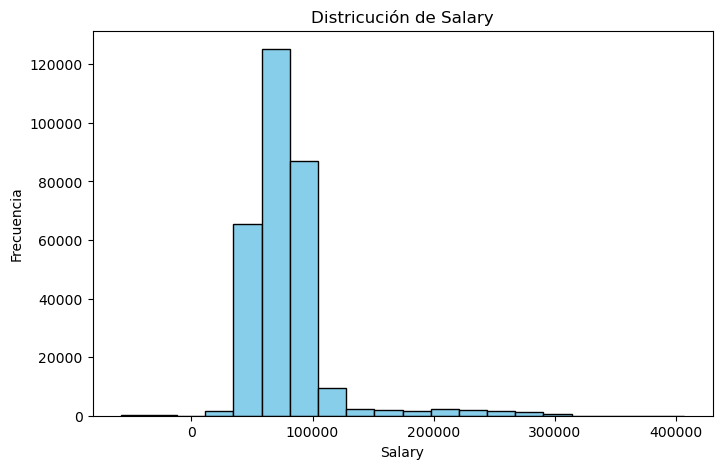

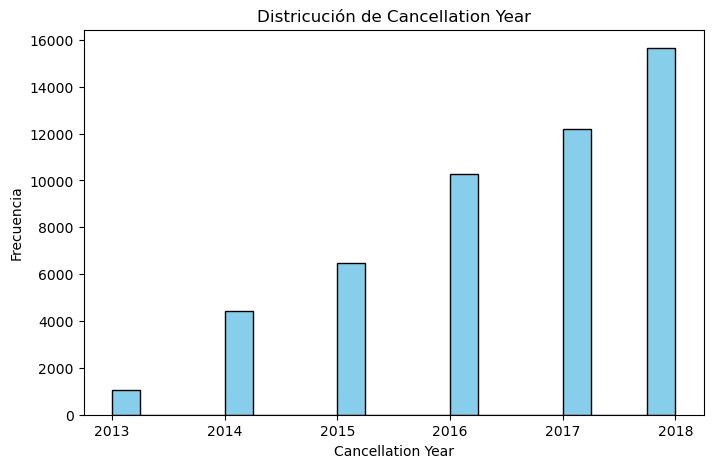

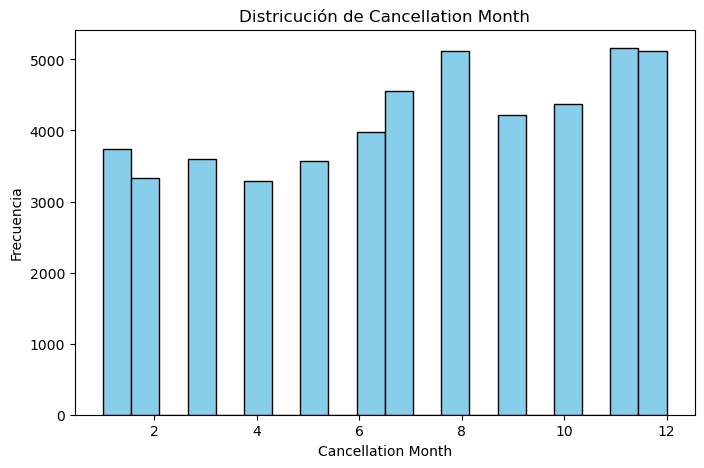

In [121]:
#  Variables numéricas con nulos
columnas_numero = merge_inner.select_dtypes(include=['number']).columns
columnas_nulos = porcentaje_nulos_merge['var'].to_list()
columnas_comunes_numero_nulos = columnas_numero.intersection(columnas_nulos)
print(f"\nVariables numéricas con nulos:")
print(columnas_comunes_numero_nulos) 
print("-------------------------------")

# Histograma ignorando valores nulos.
for col in list(columnas_comunes_numero_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(merge_inner[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Districución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [18]:
# Estratregia:
    # Salary: bajo % nulos y districucion no simetrica, se imputa con la mediana.
    # Cancellation Year: alto % nulos, se imputan con técnicas avanzadas.
    # Cancellation Month: alto % nulos, se imputan con técnicas avanzadas.

In [122]:
# Imputacion valores nulos:
median_salary =merge_inner['Salary'].median()
merge_inner['Salary'] = merge_inner['Salary'].fillna(median_salary)
print(f"\Imputamos Salary con la mediana:")
print(median_salary)
print("-------------------------")

print(f"\nImputamos Cancellation Year con técnicas avanzadas")
imputer_iter = IterativeImputer(max_iter = 10, random_state = 42)
merge_inner['Cancellation Year'] = imputer_iter.fit_transform(merge_inner[['Cancellation Year']])
print(merge_inner['Cancellation Year'])
print("-------------------------")

imputer_iter = IterativeImputer(max_iter = 10, random_state = 42)
merge_inner['Cancellation Month'] = imputer_iter.fit_transform(merge_inner[['Cancellation Month']])
print(merge_inner['Cancellation Month'])
    

\Imputamos Salary con la mediana:
73479.0
-------------------------

Imputamos Cancellation Year con técnicas avanzadas
0         2016.499521
1         2016.499521
2         2016.499521
3         2016.499521
4         2016.499521
             ...     
405619    2016.000000
405620    2016.000000
405621    2016.000000
405622    2016.000000
405623    2016.000000
Name: Cancellation Year, Length: 405624, dtype: float64
-------------------------
0         6.966443
1         6.966443
2         6.966443
3         6.966443
4         6.966443
            ...   
405619    8.000000
405620    8.000000
405621    8.000000
405622    8.000000
405623    8.000000
Name: Cancellation Month, Length: 405624, dtype: float64


In [123]:
merge_inner

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.000000,8.000000,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.000000,8.000000,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.000000,8.000000,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.000000,8.000000,2018,11,0,0,0,0,0.0,0,0


In [124]:
# Verificamos duplicados
duplicados = merge_inner.duplicated()
print(f"\nLos duplicados de mi dataset:")
print(duplicados) 
print("--------------------------------------")


Los duplicados de mi dataset:
0         False
1         False
2         False
3         False
4         False
          ...  
405619    False
405620    False
405621    False
405622    False
405623    False
Length: 405624, dtype: bool
--------------------------------------


In [125]:
# Conteo de duplicados
total_duplicados = duplicados.sum()
print(f"\nTotal duplicados encontrados:")
print(total_duplicados)


Total duplicados encontrados:
1864


In [126]:
# Eliminar duplicados.
df_sin_duplicados = merge_inner.drop_duplicates()
print(f"\nVerificamos los resultados df_sin_duplicados:")
df_sin_duplicados


Verificamos los resultados df_sin_duplicados:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.000000,8.000000,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.000000,8.000000,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.000000,8.000000,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.000000,8.000000,2018,11,0,0,0,0,0.0,0,0


In [127]:
# Eliminamos duplicados por categoría específica de "Salary"
df_sin_duplicados_categoria_especifica= df_sin_duplicados.drop_duplicates(subset=['Salary'])
print('\nDataset sin salarios duplicados:')
df_sin_duplicados_categoria_especifica


Dataset sin salarios duplicados:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2016.499521,6.966443,2017,1,0,0,0,0,0.0,0,0
24,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73479.0,Divorced,Star,3839.61,Standard,2016,3,2016.499521,6.966443,2017,1,9,1,10,1860,186.0,0,0
96,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,2016.499521,6.966443,2017,1,0,0,0,0,0.0,0,0
120,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,2016.499521,6.966443,2017,1,0,0,0,0,0.0,0,0
192,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,2016.499521,6.966443,2017,2,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404544,487195,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,86159.0,Married,Star,36168.34,Standard,2014,9,2016.499521,6.966443,2017,1,11,6,17,3383,338.0,0,0
404736,154981,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46971.0,Married,Star,37939.49,Standard,2016,12,2016.499521,6.966443,2017,1,5,0,5,400,40.0,0,0
404976,481028,Canada,Newfoundland,St. John's,A1C 6H9,Female,Bachelor,76178.0,Married,Star,39561.08,Standard,2012,5,2016.499521,6.966443,2017,1,0,0,0,0,0.0,0,0
405312,497854,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,91970.0,Married,Star,50568.26,Standard,2012,8,2016.499521,6.966443,2017,1,0,0,0,0,0.0,0,0


## FASE 2: VISUALIZACION

 1_ ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

### Receta para agrupar :
- Grupo: Flights Booked   # vuelos reservados
- Agregado:    # reservados por mes al año.
  - columna: 'Year' 'Month'
  - función: sum() # cantidad vuelos reservados

In [128]:
# Sacamos los valores de nuestras variables de trabajo.
print(f"\nlos valores de únicos de Year son:")
print(merge_inner['Year'].unique())
print("-------------------------------")
print(f"\nlos valores de únicos de Month son:")
print(merge_inner['Month'].unique())
print("-------------------------------")


los valores de únicos de Year son:
[2017 2018]
-------------------------------

los valores de únicos de Month son:
[ 1  2  3  4 10  5  6  7  8  9 11 12]
-------------------------------


In [129]:
merge_inner['Month'].dtypes

dtype('int64')

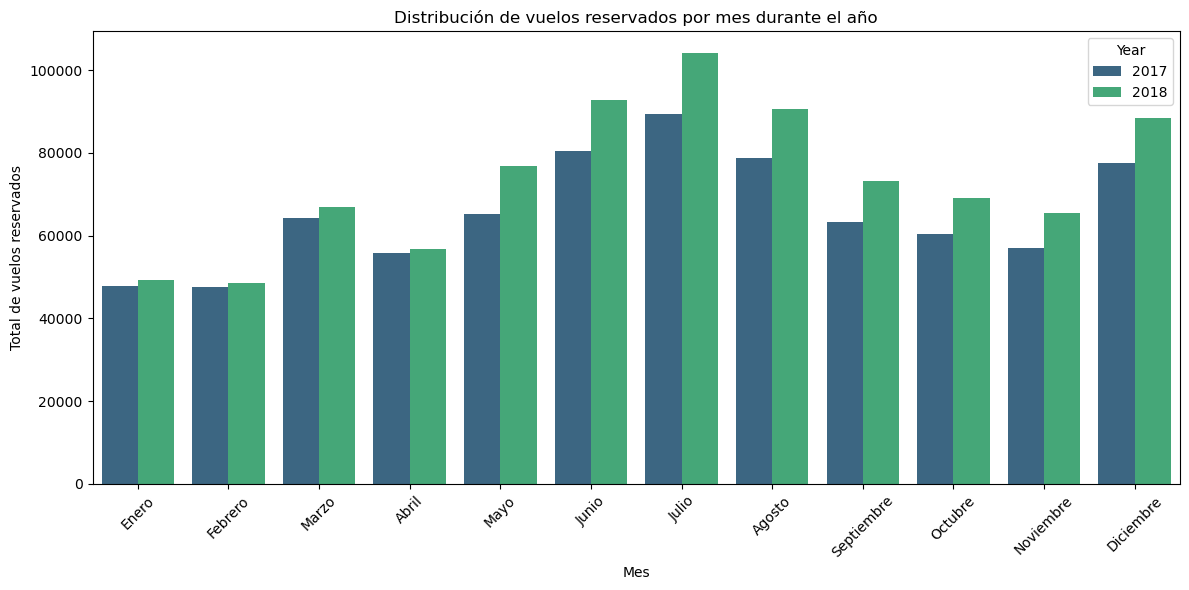

In [130]:
# Calculamos la suma de los vuelos reservados arupando por mes y año.
monthly_flights = merge_inner.groupby(['Month','Year'])['Flights Booked'].sum().reset_index()

# Transformamos la variable'Month' a formato categórico.
monthly_flights['Month'] = pd.Categorical(monthly_flights['Month'], categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=True)

# Ordenar los datos por año y mes
monthly_flights = monthly_flights.sort_values(['Year', 'Month'])

# Graficar la distribución de vuelos reservados por mes y año.
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Flights Booked', data=monthly_flights, palette='viridis', hue='Year')
plt.title('Distribución de vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Total de vuelos reservados')
plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.tight_layout()
plt.show()


Conclusión: La mayoria de los vuelos se han registrado en julio de los años estudiados, 2018 y 2017, coincidiendo con periodo vacacional. En 2018 se realizaron más vuelos que en el 2017. Tambien podemos observar pico de reservas en diciembre. El numero más bajo de vuelos reservados coincide con la cuesta de enero.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente

In [131]:
# Sacamos los nombres de las variables que buscamos: distancia y puntos acumulados.
merge_inner.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [132]:
# Comprobamos el tipo de variable: numéricas.
merge_inner.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

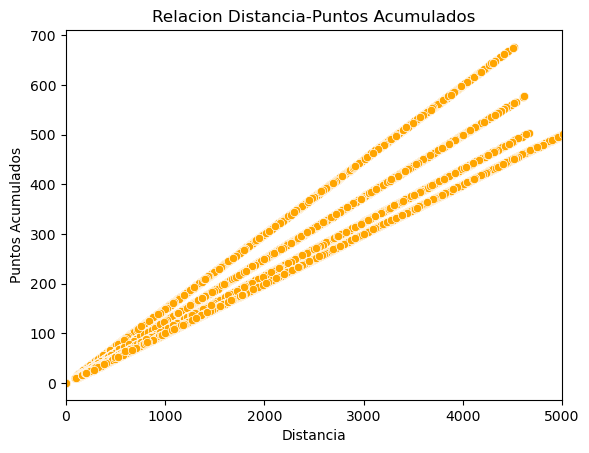

In [133]:
# Aplicamos diagrama de dispersión "scatterplot" para mostrar la relación entre dos variables numéricas.
sns.scatterplot(x = "Distance", y = "Points Accumulated", data = merge_inner, color = "orange") 
# Cambiar el rango del eje X
plt.xlim(0, 5000)
# Nombramos los ejes, damos nombre a nuestro grafico y mostramos visualización. 
plt.title("Relacion Distancia-Puntos Acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos Acumulados")
plt.show()

Conclusion para comprobar la relación entre la distancia y los vuelos empleamos un diagrama de dispersión. En la visualización observamos que existe una tendendia lineal positiva entre ambas variables que crece exponencialmente. Al aumentar la distancia del viaje aumentará el número de puntos acumulados. No se observan valores atípicos.

3_. ¿Cuál es la distribución de los clientes por provincia o estado?

In [134]:
# Visualizamos los nombres de las variables, el tipo de dato que contienen y los valores únicos de las columnas de estudio.
print(merge_inner.columns)
print("-----------------------------------------------")
print(f"\nEl tipo de datos que contiene:")
print(merge_inner.dtypes)
print("-----------------------------------------------")
print(f"\nLos valores de mi variable Country son:")
print(merge_inner['Country'])
print("-----------------------------------------------")
print(f"\nLos valores de mi variable Province son:")
print(merge_inner['Province'])

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')
-----------------------------------------------

El tipo de datos que contiene:
Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type  

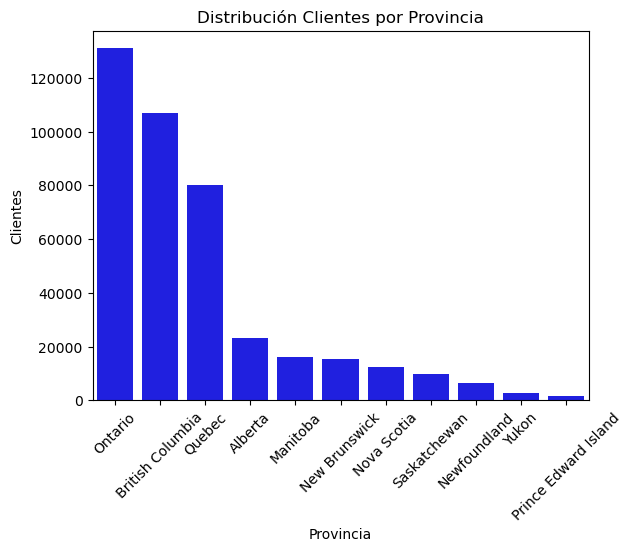

In [135]:
# Aplicamos Gráfico de barras (countplot) para sacar la distribución de nuestra variable categórica.
columna_a_explorar = merge_inner['Province'].value_counts().index
# Crear el gráfico de barras con los valores ordenados. Hue tiene que tener una variable categorica(ej. marital).
sns.countplot(x='Province', data=merge_inner, color='blue', order=columna_a_explorar)
plt.xticks(rotation=45)
plt.title("Distribución Clientes por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Clientes")
plt.show()

In [136]:
# Calculamos numericamente el número cliente por provincia.
province_counts = merge_inner['Province'].value_counts()
print(f"\nEl número de clientes por provincia es:")
print(province_counts)


El número de clientes por provincia es:
Province
Ontario                 130896
British Columbia        106848
Quebec                   79968
Alberta                  23400
Manitoba                 15984
New Brunswick            15432
Nova Scotia              12576
Saskatchewan              9936
Newfoundland              6312
Yukon                     2688
Prince Edward Island      1584
Name: count, dtype: int64


Conclusión: Observamos que todos los las provincias de nuesto dataset se encuentran en Canada por lo que para efectuar el estudio empleamos solo la columna provincia. Empleamos el gráfico de barras para determinar la distribución de nuestra variable categórica "Provincia". En la visualización observamos que la mayoría de los clientes se encuentran en Ontario, seguido de Brithis Columbia y de Quebec. Posteriormente, hemos sacado los datos numéricos de cada una de las provincias que se corresponden con los datos obtenidos en la visualización. La provincia con mayor número de clientes es Ontario con  130896 seguido de Brithis Columbia con 106848 mientras que la que tiene menor número de  clientes es prince Edwar Island.

4_. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [137]:
# Visualizamos el tipo de dato de nuestras variables de trabajo.
merge_inner['Salary'].dtypes
print(f"\nEl tipo de datos de Salary es:")
print(merge_inner['Salary'].dtypes)
print(f"Variable Numérica")
print("----------------------------------")
merge_inner['Education'].dtypes
print(f"\nEl tipo de datos de Education es:")
print(merge_inner['Education'].dtypes)
print(f"Variable Categórica")


El tipo de datos de Salary es:
float64
Variable Numérica
----------------------------------

El tipo de datos de Education es:
object
Variable Categórica


In [35]:
# Calculamos el salario promedio por nivel educativo y redondeamos a 2 decimales.
mean_salary= merge_inner.groupby('Education')['Salary'].mean()
print(f"\nEl salario promedio por nivel educativo es:")
print(mean_salary.round(2))


El salario promedio por nivel educativo es:
Education
Bachelor                 72476.21
College                  73479.00
Doctor                  178335.44
High School or Below     60986.54
Master                  103767.49
Name: Salary, dtype: float64


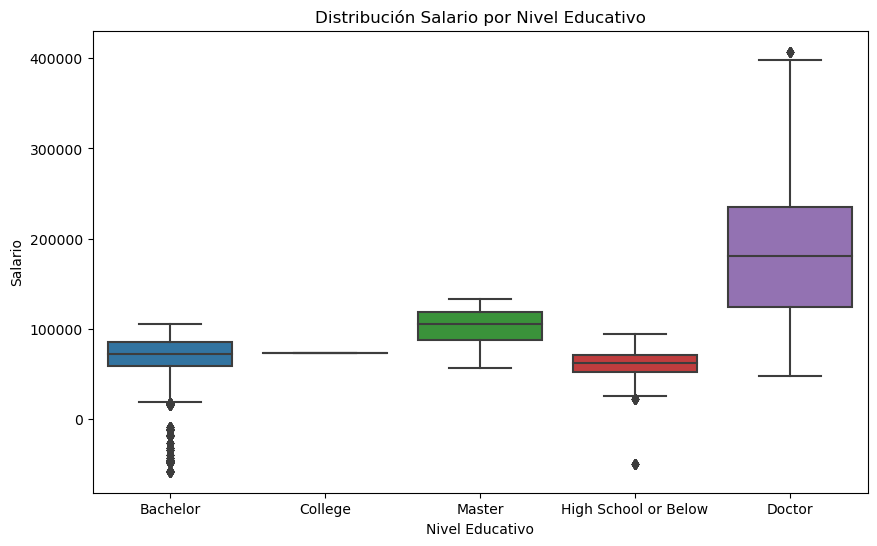

In [138]:
# Aplicamos boxplot(diagrama de bigotes) para ver la relación entre mi variable numérica y mi variable categórica.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Salary', data=merge_inner)
# Añadir título y ejes.
plt.title('Distribución Salario por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario')
plt.show()

In [139]:
summary_statistics= merge_inner.groupby('Education')['Salary'].describe().T
print(f"\nLos parámetros estadísticos básicos por nivel educativo:")
print(summary_statistics.round(2))


Los parámetros estadísticos básicos por nivel educativo:
Education   Bachelor   College     Doctor  High School or Below     Master
count      253752.00  102672.0   17856.00              19008.00   12336.00
mean        72476.21   73479.0  178335.44              60986.54  103767.49
std         17205.71       0.0   70307.64              12723.92   17514.34
min        -58486.00   73479.0   48109.00             -49830.00   56414.00
25%         58711.00   73479.0  124343.75              52044.75   88120.00
50%         71971.00   73479.0  180440.00              61806.00  105487.00
75%         85848.00   73479.0  235069.25              71344.00  118530.00
max        105563.00   73479.0  407228.00              93875.00  133080.00


Conclusión: A nivel gráfico observamos que el salario es más alto es para la categoría de Doctor seguido de nivel Master, Hight school y Bachelor. Podemos apreciar que la categoría College no tiene rango salarial asociado.  Se observa presencia de outliers en los niveles educativos de Doctor, Bachelor y Higth school lo que nos da una idea de que en esos niveles. Se niveles puede haber salarios más altos o mas bajas respesto a la media.  A  continuación, hemos procedido a sacar los parámetros estadísticos básicos de  cada uno de los niveles educativos que podemos ver en la visualización: medianda, percentil 25 y percentil 75.

5_. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [140]:
merge_inner.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [141]:
# Calculamos la frecuencia relativa y absoluta de Loyalty Card.
frecuencia_absoluta = merge_inner['Loyalty Card'].value_counts()
frecuencia_relativa = merge_inner['Loyalty Card'].value_counts(normalize=True) *100 #normalize=true nos calula la proporción. 
# Crear un DataFrame con los datos de las proporciones.
tabla_frecuencias = pd.DataFrame({'Loyalty Card': frecuencia_absoluta.index,'frecuencia absoluta': frecuencia_absoluta.values,'frecuencia relativa': frecuencia_relativa.values})
# vemos la tabla de frecuencias
tabla_frecuencias

,Loyalty Card,frecuencia absoluta,frecuencia relativa
0,Star,184224,45.417431
1,Nova,137568,33.915153
2,Aurora,83832,20.667416


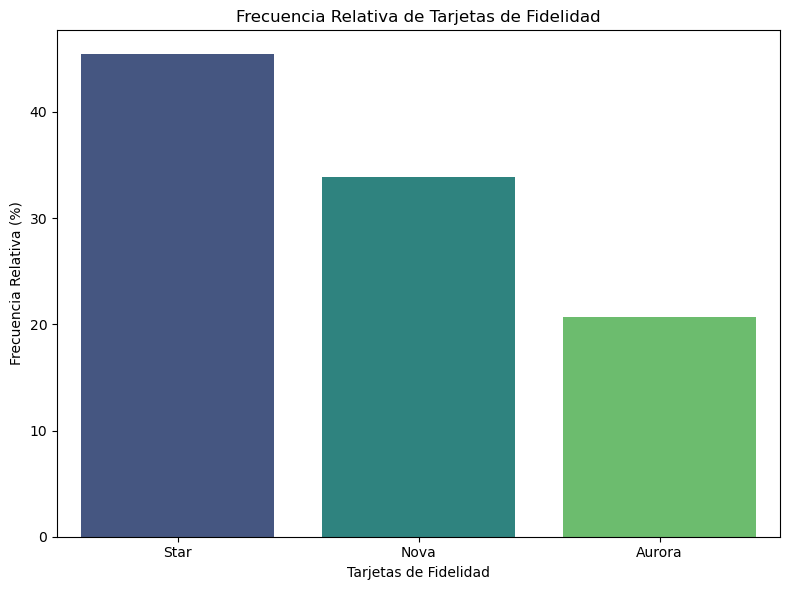

In [142]:
# Crear un gráfico de barras para mostrar el % de clientes por tipo de tarjeta.
plt.figure(figsize=(8, 6))
sns.barplot(x='Loyalty Card', y='frecuencia relativa', data=tabla_frecuencias, palette='viridis')
# Nombramos el gráfico y damos nombre a los ejes.
plt.title('Frecuencia Relativa de Tarjetas de Fidelidad')
plt.xlabel('Tarjetas de Fidelidad')
plt.ylabel('Frecuencia Relativa (%)')
plt.tight_layout()
plt.show()

In [143]:
merge_inner['Loyalty Card'].describe()

count     405624
unique         3
top         Star
freq      184224
Name: Loyalty Card, dtype: object

Conclusión: Empleamos diagrama de barras para represntar la proporción de tarjetas de fidelidad por clientes. En la visualización observamos que las tarjetas de  tipo star son lla más frecuente seguida de la tipo Nova. Las de tipo aurora son las menos frecuentes. El 45% de los clientes tienen la star, el 34% la nova y el 21 % la aurora aproximadamente.

6_¿Cómo se distribuyen los clientes según su estado civil y género?

In [144]:
merge_inner.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [145]:
# Agrupamos por genero la columna de marital status, calculamos el porcentaje y renombramos.
civil_status_gender =merge_inner.groupby('Gender')['Marital Status'].value_counts(normalize=True).mul(100)
civil_status_gender = civil_status_gender.reset_index(name='Percentage')
print(f"\nEl porcentaje de genero según el estado civil es:")
print(civil_status_gender.round(2))


El porcentaje de genero según el estado civil es:
   Gender Marital Status  Percentage
0  Female        Married       57.86
1  Female         Single       26.98
2  Female       Divorced       15.17
3    Male        Married       58.41
4    Male         Single       26.59
5    Male       Divorced       15.00


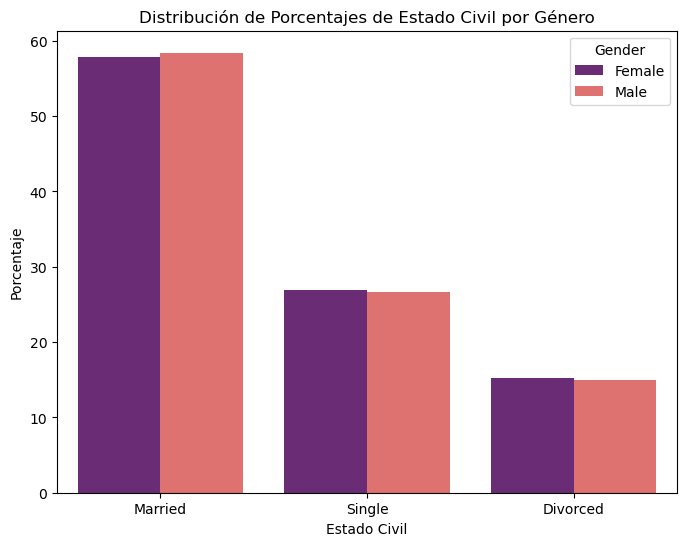

In [146]:
# Visualizar el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital Status',y='Percentage', hue='Gender', data=civil_status_gender,palette = "magma")
#  Nombramos nuestro gráfico y añadimos los ejes.
plt.title("Distribución de Porcentajes de Estado Civil por Género")
plt.xlabel("Estado Civil")
plt.ylabel("Porcentaje")
plt.show()

Conclusión:según los datos obtenidos no hay diferencias significativas por género. Sin embargo si hay diferencia en los porcentajes según el estado civil. El porcentaje de casados, tanto en mujeres como hombres, es bastante más alto que para los solteros y divorciado ( casados aproximadamente 58% frente a un 25% en  la categoria de solteros y un 15% en divorciados).
Destacacar que hay un porcentaje ligeramente mayor de hombres casados que de mujeres mientras que para las mujeres el porcentaje de solteras y divorciadas es menor que para los hombres.

# BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [45]:
# Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, lospasos que deberas seguir son:

In [256]:
# Filtramos el DataFrame para incluir solo las columnas relevantes 'Education' y 'Flights booked'.
flights_education= merge_inner[['Flights Booked', 'Education']]
print(flights_education.head())


   Flights Booked Education
0               0  Bachelor
1               3  Bachelor
2               0  Bachelor
3               0  Bachelor
4               6  Bachelor


In [ ]:
# Agrupamos los datos por columna 'Education' y calculamos estadísticas descriptivas básicas para cada nivel educativo.
summary_statistics = flights_education.groupby('Education')['Flights Booked'].describe()
# Mostrar las estadísticas descriptivas
print(summary_statistics)


                         count      mean       std  min  25%  50%  75%   max
Education                                                                   
Bachelor              253752.0  4.091093  5.216995  0.0  0.0  1.0  8.0  21.0
College               102672.0  4.153012  5.242136  0.0  0.0  1.0  8.0  21.0
Doctor                 17856.0  4.146281  5.250093  0.0  0.0  1.0  8.0  21.0
High School or Below   19008.0  4.155777  5.234551  0.0  0.0  1.0  8.0  21.0
Master                 12336.0  4.184014  5.210294  0.0  0.0  1.0  8.0  21.0


In [236]:
# Prueba Estadística: pasos a seguir para la realización de la Prueba de hipótesis:
    # Formular Hipóteis:
        # Hipótesis nula H[0]
        # Hipótesis alternativa H[1]
    # Establecer la Muestra
    # Calculo de metricas.
    # Selección nivel de significancia (alpha): 0.05
    # Comprobar condiciones- Normalidad/homogeneidad varianza
    # Seleccionar estadístico
    # Toma de decisión -- Comparar p_valor con alphar.
    # interpretación resultados

In [237]:
# Planteamos nuestra hipotesis:
    # H[0]: No existe diferencia entre nivel educativo y vuelos reservados.
    # H[1]:existe diferencia entre nivel educativo y vuelos reservados.

In [208]:
# Verificamos los niveles educativos únicos en la columna 'nivel_educativo'
education_level = merge_inner['Education'].unique()
print(f"\nLos niveles educativos son:")
print(education_level)


Los niveles educativos son:
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


In [264]:
# Seleccionamos la muestra.
muestra_bachelor = merge_inner[merge_inner['Education'] == 'Bachelor']['Flights Booked']
muestra_doctor = merge_inner[merge_inner['Education'] == 'Doctor']['Flights Booked']
muestra_higt_school = merge_inner[merge_inner['Education'] == 'Hight School or Below']['Flights Booked']
muestra_master = merge_inner[merge_inner['Education'] == 'Master']['Flights Booked']
muestra_college = merge_inner[merge_inner['Education'] == 'College']['Flights Booked']

In [259]:
# Seleccionamos un nivel significancia de 0.05.
alpha = 0.05
print(f"\nEl nivel de significancia es:")
print(alpha)


El nivel de significancia es:
0.05


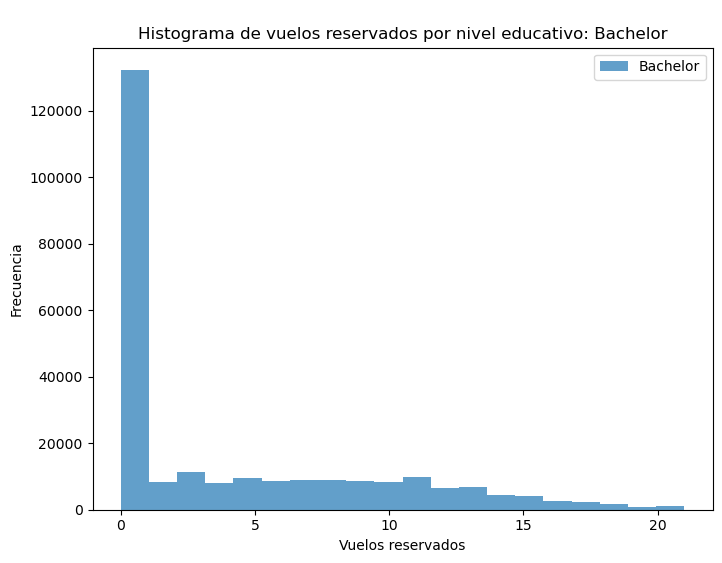

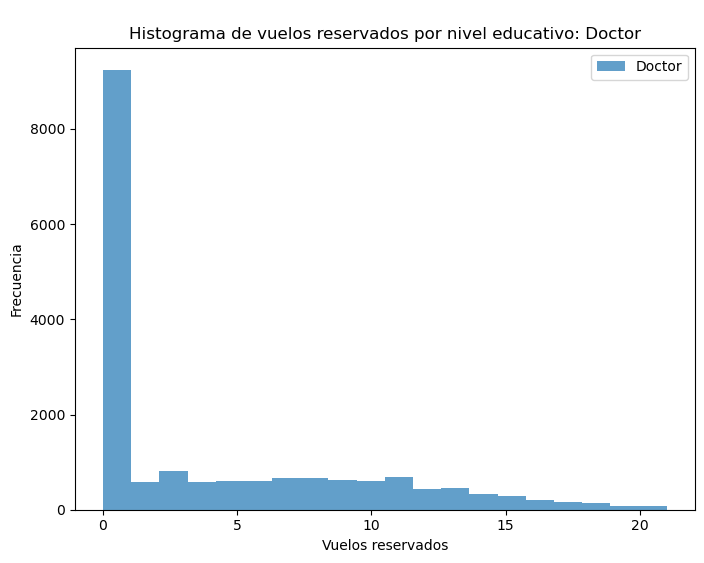

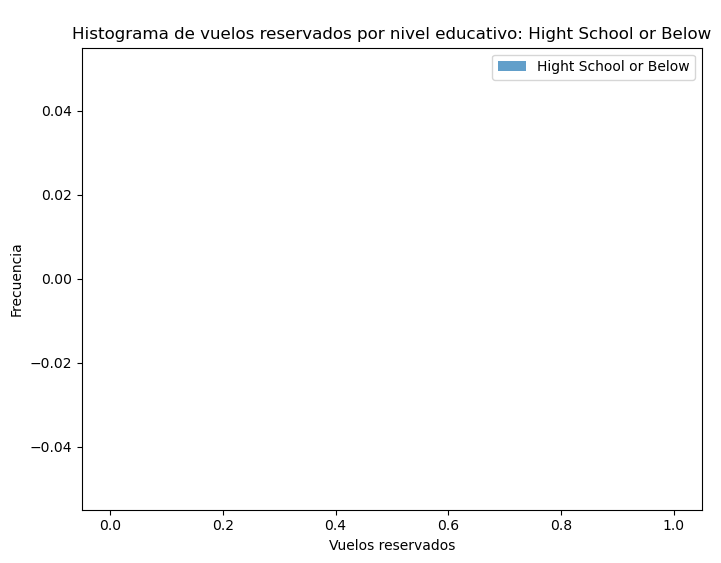

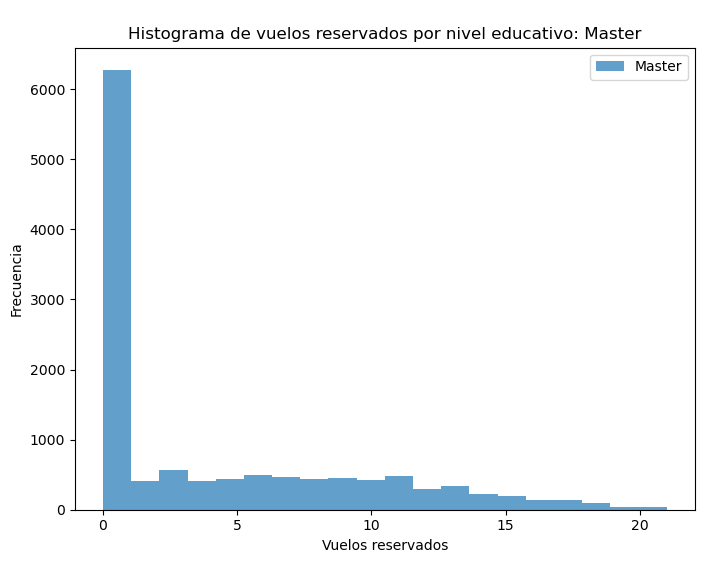

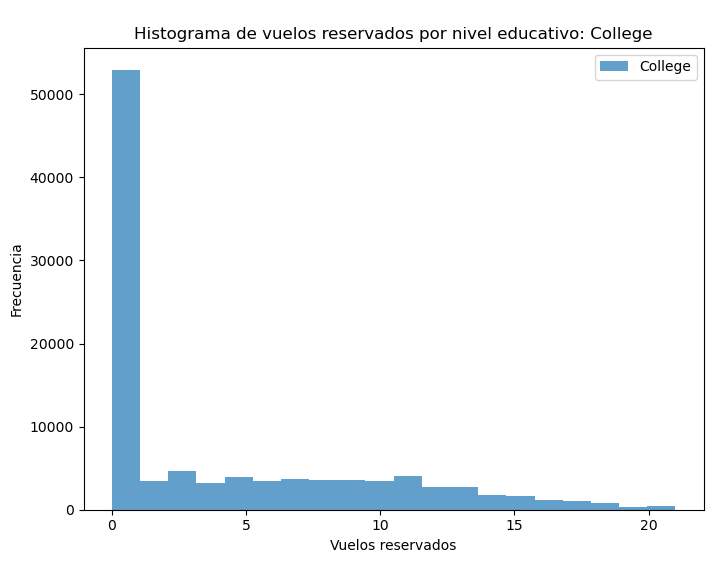

In [260]:
# Comprobamos  la condición de normalidad empleando la visualizacón del HISTOGRAMA para cada nivel educativo.
for level in ['Bachelor', 'Doctor', 'Hight School or Below', 'Master', 'College']:
    plt.figure(figsize=(8, 6))
    subset = merge_inner[merge_inner['Education'] == level]['Flights Booked']
    plt.hist(subset, bins=20, alpha=0.7, label=level)
    plt.title(f"\nHistograma de vuelos reservados por nivel educativo: {level}")
    plt.xlabel('Vuelos reservados')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

In [325]:
# Comprobamos condición de normalidad
def check_normalidad(data):
    n = len(data)
    # Condición para elegir la prueba
    if n <= 5000:
        # Usar Shapiro-Wilk para muestras pequeñas y medianas (Hasta 5000)
        test_name = "Shapiro-Wilk"
        stat, p_value = shapiro(data)
    else:
        # Usar Kolmogorov-Smirnov para muestras grandes
        test_name = "Kolmogorov-Smirnov"
        stat, p_value = kstest(data, 'norm')

    # Decisión sobre la hipótesis nula
    if p_value > 0.05:
        decision = "No se rechaza H0: Los datos parecen seguir una distribución normal."
    else:
        decision = "Se rechaza H0: Los datos no siguen una distribución normal."
    
    # Retornar los resultados
    return {
        "Prueba": test_name,
        "Estadístico": stat,
        "p-value": p_value,
        "Decisión": decision
    }

# Aplicamos la función check normalidad a cada nivel educativo
for nivel in education_level:
    muestra = merge_inner[merge_inner['Education'] == nivel]['Flights Booked']
    # Comprobar la normalidad para el nivel educativo.
    resultado = check_normalidad(muestra)
    print(f"\nResultados para el nivel educativo: {nivel}")
    print(resultado)


Resultados para el nivel educativo: Bachelor
{'Prueba': 'Kolmogorov-Smirnov', 'Estadístico': 0.5, 'p-value': 0.0, 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

Resultados para el nivel educativo: College
{'Prueba': 'Kolmogorov-Smirnov', 'Estadístico': 0.5, 'p-value': 0.0, 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

Resultados para el nivel educativo: Master
{'Prueba': 'Kolmogorov-Smirnov', 'Estadístico': 0.5, 'p-value': 0.0, 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

Resultados para el nivel educativo: High School or Below
{'Prueba': 'Kolmogorov-Smirnov', 'Estadístico': 0.5, 'p-value': 0.0, 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

Resultados para el nivel educativo: Doctor
{'Prueba': 'Kolmogorov-Smirnov', 'Estadístico': 0.5, 'p-value': 0.0, 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}


In [340]:
# Chequeamos la homogeneidad de varianzas
def check_homogeneidad_varianza(*groups):
    # Siempre usamos la prueba de Levene, ya que los datos no son normales
    stat, p_value = levene(*groups)

    # Decisión sobre la hipótesis nula
    if p_value > 0.05:
        decision = "No se rechaza H0: Las varianzas son homogéneas."
    else:
        decision = "Se rechaza H0: Las varianzas no son homogéneas."

    # Retornar los resultados
    return {
        "Prueba": "Levene",
        "Estadístico": stat,
        "p-value": p_value,
        "Decisión": decision
    }
    # Supongamos que tenemos los datos de vuelos reservados por nivel educativo
muestra_bachelor = merge_inner[merge_inner['Education'] == 'Bachelor']['Flights Booked']
muestra_doctor = merge_inner[merge_inner['Education'] == 'Doctor']['Flights Booked']
muestra_hight_school = merge_inner[merge_inner['Education'] == 'High School or Below']['Flights Booked']
muestra_master = merge_inner[merge_inner['Education'] == 'Master']['Flights Booked']
muestra_college = merge_inner[merge_inner['Education'] == 'College']['Flights Booked']

# Aplicamos la prueba de homogeneidad de varianzas para los 5 niveles educativos.
resultados = check_homogeneidad_varianza(muestra_bachelor, muestra_doctor, muestra_hight_school, muestra_master, muestra_college)
print(resultados)


{'Prueba': 'Levene', 'Estadístico': 3.171974526204691, 'p-value': 0.01290681079552744, 'Decisión': 'Se rechaza H0: Las varianzas no son homogéneas.'}


In [328]:
# Conclusión: nuestros datos no siguen una distribución normal ni tienen homogeneidad de varianzas por lo que para selección del estadístico utilizamos test no paramétricos. En nuestro caso al disponer de 5 niveles educativos empleamos a Kruskal-Wallis dado que nos permite comprar más de 2 grupos sin distribución normal.

In [339]:
# Aplicamos la prueba de Kruskal-Wallis para comparar las distribuciones de los 5 grupos.
stat, p_value = kruskal(muestra_bachelor, muestra_doctor, muestra_hight_school, muestra_master, muestra_college)
print(f"\nEstadístico de Kruskal-Wallis:")
print( stat)
print(f"\nValor p:")
print(p_value)


Estadístico de Kruskal-Wallis:
17.990591870818033

Valor p:
0.0012393337284342227


In [337]:
# Toma de decisión
if p_value > alpha:
    print(f"\nNo se rechaza H0: No existe diferencia entre nivel educativo y vuelos reservados.")
else:
    print(f"\nSe rechaza H0: Hay diferencias significativas entre nivel educativo y vuelos reservados.")


Se rechaza H0: Hay diferencias significativas entre nivel educativo y vuelos reservados.


In [343]:
# Interpretación:
#El p_valor es menor que alphar(0.05) por lo que se rechaza la H0,aceptando la hipotesis alternativa, que indica que si hay diferencia entre el nivel educativo y el numero de vuelos reserevados. 